## 모듈 불러오기

In [2]:
!pip install plotly

In [51]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc, animation
from scipy import stats

plt.rcParams['axes.unicode_minus'] = False # unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # 한글 사용

import plotly as py
import plotly.graph_objects as go 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
mapbox_access_token = 'pk.eyJ1IjoiamFja2x1byIsImEiOiJjaXhzYTB0bHcwOHNoMnFtOWZ3YWdreDB3In0.pjROwb9_CEuyKPE-x0lRUw'

import warnings
warnings.filterwarnings(action='ignore') # 경고창 무시

import time as t
from datetime import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

def frame_args(d1,d2):
    return {
            "frame": {"duration": d1},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": d2, "easing": "linear"},
        }

In [125]:
# 연습
px.set_mapbox_access_token(mapbox_access_token)
df = px.data.carshare()
# print(df[['centroid_lat',"centroid_lon","peak_hour","car_hours"]])
print(df.peak_hour)
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

0       2
1      23
2      20
3      23
4      19
5       1
6      18
7      14
8       2
9       1
10      2
11      3
12     21
13     11
14      1
15      5
16      6
17     15
18      0
19     14
20      2
21     23
22      3
23     20
24      3
25      2
26      5
27      3
28      9
29      5
30     10
31     11
32      3
33     13
34     20
35     13
36      9
37      4
38     11
39     17
40      1
41     16
42     10
43     19
44      5
45     10
46     16
47     20
48      2
49     20
50      8
51      3
52      2
53     12
54      1
55     21
56     20
57      7
58      3
59     19
60      7
61      0
62     19
63     11
64     23
65      0
66      1
67     21
68     20
69      5
70      0
71     11
72     20
73      9
74      0
75     13
76      4
77      3
78      3
79     13
80      4
81     11
82     20
83     13
84     19
85      2
86     13
87      4
88     23
89     15
90      9
91      4
92      3
93      8
94     11
95     11
96      5
97      2
98      1
99      2


## 서울 데이터 불러오기

In [194]:
infected_df = pd.read_csv('../input/서울시 코로나19 확진자 현황.csv', encoding='euc-kr')
movement_04 = pd.read_csv('../input/Floating_Population_2004.csv')
movement_05 = pd.read_csv('../input/Floating_Population_2005.csv')
movement_06 = pd.read_csv('../input/Floating_Population_2006.csv')
movement_07 = pd.read_csv('../input/Floating_Population_2007.csv')
Seoul_lat_lon = pd.read_csv('../input/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv', encoding='euc-kr')

In [5]:
infected_province = infected_df[['확진일','지역']]
movement_province4 = movement_04[['일자','군구','유동인구수']]
movement_province5 = movement_05[['일자','군구','유동인구수']]
movement_province6 = movement_06[['일자','군구','유동인구수']]
movement_province7 = movement_07[['일자','군구','유동인구수']]

In [6]:
infected_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진일     4131 non-null   object
 1   지역      4131 non-null   object
dtypes: object(2)
memory usage: 64.7+ KB


In [7]:
# 서울 시 유동인구 데이터
m_p_4 = movement_province4.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
m_p_5 = movement_province5.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
m_p_6 = movement_province6.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
m_p_7 = movement_province7.pivot_table('유동인구수', index='일자',columns='군구', aggfunc=sum)
mp4567= m_p_4.append(m_p_5).append(m_p_6).append(m_p_7)
mp4567.columns

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='군구')

In [8]:
# 일자 datetime인덱스로 조정

mp4567['일자'] = pd.date_range("2020-04-01", "2020-07-31")
mp4567.set_index('일자', inplace=True)
mp4567

군구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
일자,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-01,14944020,7934450,5624820,10571700,9401700,6816880,8565270,5714760,9431880,5666470,7065350,7511770,8363980,6169950,10357400,6392860,8127720,12582200,7769940,9864500,5184530,7919310,5496890,5776450,6953700
2020-04-02,14939240,7917550,5621860,10567340,9381370,6807500,8545290,5691220,9410400,5651510,7055640,7485400,8339280,6154430,10346170,6384520,8100730,12550290,7753060,9837980,5171930,7902260,5484130,5767350,6924750
2020-04-03,14824170,7923530,5619980,10540320,9361710,6821490,8490770,5622840,9387850,5645750,7016290,7464030,8380250,6119460,10352560,6361450,8069020,12512150,7739990,9770610,5213920,7894820,5411050,5679210,6913500
2020-04-04,11799100,8194020,5945760,10645880,9888740,7093530,8236260,4897970,9936100,6025390,6967170,7637370,7959290,6077150,8722650,5867670,8289680,12247760,8153590,8410600,4803310,8488040,4087520,3504600,7281910
2020-04-05,10901220,8235610,6066410,10692680,10070660,7091860,8345210,4910770,10123520,6199910,6949080,7650620,7705080,6063080,8251710,5748080,8423890,12171500,8285740,8248120,4674440,8675850,3723440,3047560,7440280
2020-04-06,14919780,7931710,5634950,10582060,9358420,6783260,8579430,5761960,9401180,5662290,7058120,7461410,8292290,6136200,10349960,6356050,8094950,12517500,7779360,9842510,5158800,7919190,5498560,5889830,6949860
2020-04-07,15050390,7900800,5616450,10550760,9344380,6767860,8509240,5715970,9372960,5625320,7054200,7453330,8310520,6156590,10390100,6381380,8078870,12510110,7740270,9833560,5187070,7876140,5559030,5906780,6911680
2020-04-08,14969060,7899720,5606970,10547030,9352610,6776390,8529710,5706640,9366960,5628290,7047260,7445180,8343950,6144020,10375380,6382040,8082520,12500100,7737280,9821990,5178840,7871540,5564040,5869420,6908170
2020-04-09,14979370,7884160,5601810,10522910,9339310,6772350,8523130,5711640,9367260,5615950,7042290,7430380,8333470,6152890,10371290,6366720,8076590,12499650,7725090,9820120,5190340,7862160,5548590,5905600,6898400


In [9]:
# plotly
# 5.29는 전산오류일듯
# 4월 부터의 서울시 전체 유동인구량
# 5월 6일 부터 시행된 생활속 거리두기에서 해제되고 얼마 지나지 않아 다시 매우 활발히 활동하는 것을 볼 수 있음.
mp4567_sum = mp4567.sum(axis=1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mp4567_sum.index , y=mp4567_sum, marker_color='orange', name='확진자 증감 시도표'))
fig

In [167]:
# 5678월의 서울시 확진자 수

infected567 = infected_province[(infected_province.확진일 >= '5.06.') & (infected_province.확진일 < '9.1.')]
infected567['수'] = 1
for i in range(len(infected567)):
    tmp = infected567.iloc[i, 0].replace('.','')
    if len(tmp) != 3:
        infected567.iloc[i, 0] = tmp[0] + '0' +tmp[-1]
    else:
        infected567.iloc[i, 0] = tmp



# 서울시 전체의 확진자 수 추이
infected_num = infected567.groupby('확진일').sum()
infected_num.reset_index()
infected_num['확진일'] = pd.date_range("2020-05-08", "2020-09-02")
infected_num.set_index('확진일', inplace=True)
# infected_num
infected567

,확진일,지역,수
0,902,강서구,1
1,902,강동구,1
2,902,노원구,1
3,902,서초구,1
4,902,노원구,1
...,...,...,...
3489,508,용산구,1
3490,508,용산구,1
3491,508,용산구,1
3492,508,용산구,1


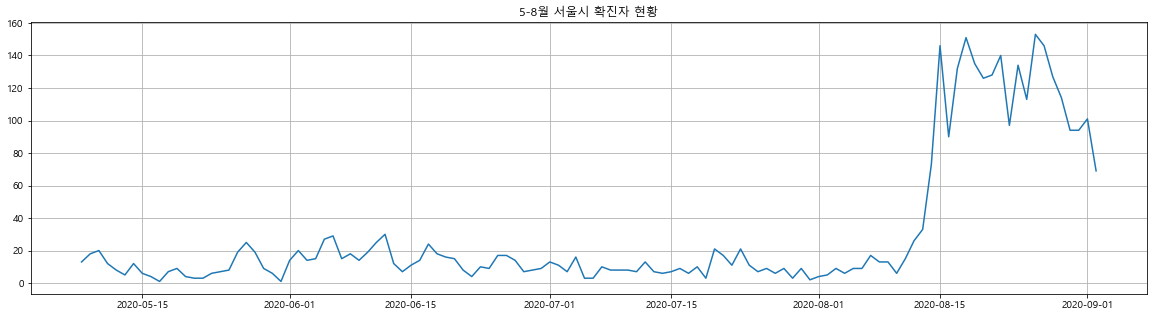

In [11]:
# matplot
plt.figure(figsize=(20, 5))
plt.plot(infected_num)
plt.title('5-8월 서울시 확진자 현황')
plt.grid()
plt.show()

In [12]:
# plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=infected_num.index , y=infected_num.수, marker_color='orange', name='확진자 수'))
fig

In [13]:
# 서울시 지역에 따른 확진자 수 (타 도시 포함)

infected = infected567.pivot_table('수', index=['확진일'], columns='지역', aggfunc=sum)
infected.reset_index()
infected['확진일'] = pd.date_range("2020-05-08", "2020-09-02")
infected.set_index('확진일', inplace=True)
infected.fillna(0, inplace=True)
infected = infected.astype('int64')
infected

지역,강남구,강동구,강북구,강서구,경기,경기광주,고양시,관악구,광명,광진구,구로구,구리,군포,금천구,기타,김포,남양주시,노원구,대구,대전,도봉구,동대문구,동작구,마포구,부천시,부평,서대문구,서초구,성남시,성동구,성북구,송파구,수원시,안산,안양시,양주시,양천구,양평,영등포구,용산구,용인시,은평구,의왕,의정부,인천시,종로구,주소불명,중구,중구(노원),중구(은평),중랑구,타시도,포천,하남,화성,확인(구로),확인(동작)
확진일,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-08,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2020-05-09,1,0,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-05-10,4,1,1,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-05-11,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2020-05-12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-05-13,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-05-14,1,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-05-15,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-05-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# 서울시에서 발생하지 않은 확진자는 제외.
seo = []
for prov in infected567.지역.unique():
    if prov not in np.array(mp4567.columns.to_list()):
        seo.append(prov)
    
not_seoul = [x for x in infected567.지역.unique() if x in seo]
seoul = [x for x in infected567.지역.unique() if x not in seo]

print(not_seoul)
print((seoul))

['타시도', '경기', '기타', '중구(노원)', '확인(동작)', '확인(구로)', '중구(은평)', '부천시', '고양시', '경기광주', '성남시', '하남', '화성', '안양시', '포천', '대구', '용인시', '광명', '대전', '남양주시', '군포', '의정부', '주소불명', '안산', '수원시', '김포', '인천시', '양주시', '양평', '구리', '의왕', '부평']
['강서구', '강동구', '노원구', '서초구', '관악구', '강남구', '강북구', '은평구', '성북구', '중구', '광진구', '양천구', '송파구', '서대문구', '동대문구', '중랑구', '마포구', '성동구', '영등포구', '도봉구', '동작구', '종로구', '용산구', '금천구', '구로구']


In [17]:
# 서울시 지역에 따른 확진자 수 (타 도시 미포함)

infected_Seoul = infected.drop(not_seoul, axis=1)
# infected_Seoul.astype('int64')
infected_Seoul

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
확진일,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-08,0,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,1,1,0
2020-05-09,1,0,0,2,1,2,0,0,0,1,0,1,0,1,1,0,2,1,0,0,4,0,0,0,1
2020-05-10,4,1,1,0,3,1,0,0,0,0,1,2,0,0,0,1,1,1,1,0,3,0,0,0,0
2020-05-11,0,0,1,2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
2020-05-12,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0
2020-05-13,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2020-05-14,1,2,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,1,0,1,2,0,0,0,0
2020-05-15,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0
2020-05-16,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


In [175]:
# 확진일을 datetime으로 바꾸고 서울시 외의 지역은 삭제

infected_tmp = infected567.copy()
date = ['2020-0'+i[0]+'-'+i[1:] for i in infected_tmp.확진일]
# print(date)
infected_tmp.확진일 = date
drop=[]
for ns in not_seoul:
    infected_tmp.drop(infected_tmp[infected_tmp.지역 == ns].index, inplace=True)
infected_tmp[:20]

,확진일,지역,수
0,2020-09-02,강서구,1
1,2020-09-02,강동구,1
2,2020-09-02,노원구,1
3,2020-09-02,서초구,1
4,2020-09-02,노원구,1
5,2020-09-02,강동구,1
6,2020-09-02,강동구,1
7,2020-09-02,강동구,1
8,2020-09-02,강동구,1
10,2020-09-02,관악구,1


In [176]:
# 서울시의 모든 도시를반영하기 위해 날짜 별로 지역과 수1을 넣어줌 --> 나중에 전체에서 1빼줄거임
# 모든 날을 반영해야 하므로 
for date in pd.date_range("2020-05-08", "2020-09-02"):
    date = str(date)[:10]
    for emp in seoul:  
        dic = {'확진일': date, '지역': emp, '수':1}
        infected_tmp = infected_tmp.append(dic, ignore_index=True)

infected_tmp
# pd.merge(infected_tmp, Seoul_lat_lon, left_on='지역', right_on='군구', how='inner')


,확진일,지역,수
0,2020-09-02,강서구,1
1,2020-09-02,강동구,1
2,2020-09-02,노원구,1
3,2020-09-02,서초구,1
4,2020-09-02,노원구,1
...,...,...,...
6201,2020-09-02,동작구,1
6202,2020-09-02,종로구,1
6203,2020-09-02,용산구,1
6204,2020-09-02,금천구,1


In [190]:
infected_pro = infected_tmp.groupby(['지역','확진일']).sum()-1
infected_pro = infected_pro.reset_index()
infected_pro

,지역,확진일,수
0,강남구,2020-05-08,0
1,강남구,2020-05-09,1
2,강남구,2020-05-10,4
3,강남구,2020-05-11,0
4,강남구,2020-05-12,0
...,...,...,...
2945,중랑구,2020-08-29,5
2946,중랑구,2020-08-30,3
2947,중랑구,2020-08-31,5
2948,중랑구,2020-09-01,7


In [196]:
len(pd.date_range("2020-05-08",'2020-09-02'))

118

##  서울시 도시별 위도 경도 데이터

In [195]:
Seoul_lat_lon = Seoul_lat_lon[['시군구명_한글','위도','경도']].sort_values(by='시군구명_한글').reset_index().drop('index', axis=1)
Seoul_lat_lon.rename(columns={'시군구명_한글' : '지역'}, inplace=True)
Seoul_lat_lon

,지역,위도,경도
0,강남구,37.495985,127.066409
1,강동구,37.549208,127.146482
2,강북구,37.646995,127.014716
3,강서구,37.565762,126.822656
4,관악구,37.465399,126.943807
5,광진구,37.548144,127.085753
6,구로구,37.495486,126.858121
7,금천구,37.460097,126.900155
8,노원구,37.655264,127.077120
9,도봉구,37.665861,127.031767


In [197]:
# 합칠 위경도 데이터  ---> 안됨 ----> 행을 늘린 후 pro의 groupby를 풀어서 합치기 가능
latlon2 = Seoul_lat_lon[['위도','경도']].copy()
latlon = pd.DataFrame(columns=['위도','경도'])
for i in range(len(latlon2)):
    for j in range(0,118):
        latlon=latlon.append(latlon2.iloc[i], ignore_index=True)

latlon

,위도,경도
0,37.495985,127.066409
1,37.495985,127.066409
2,37.495985,127.066409
3,37.495985,127.066409
4,37.495985,127.066409
...,...,...
2945,37.595379,127.093967
2946,37.595379,127.093967
2947,37.595379,127.093967
2948,37.595379,127.093967


In [198]:
infected_pro[['위도','경도']] = latlon
infected_pro

,지역,확진일,수,위도,경도
0,강남구,2020-05-08,0,37.495985,127.066409
1,강남구,2020-05-09,1,37.495985,127.066409
2,강남구,2020-05-10,4,37.495985,127.066409
3,강남구,2020-05-11,0,37.495985,127.066409
4,강남구,2020-05-12,0,37.495985,127.066409
...,...,...,...,...,...
2945,중랑구,2020-08-29,5,37.595379,127.093967
2946,중랑구,2020-08-30,3,37.595379,127.093967
2947,중랑구,2020-08-31,5,37.595379,127.093967
2948,중랑구,2020-09-01,7,37.595379,127.093967


In [26]:
# 기간 내 한 지역에서 최대 확진자
max_range_mean = np.mean(list(map(max, infected_Seoul.values)))
max_range = max(list(map(max, infected_Seoul.values)))
max_range = max_range - max_range_mean
max_range= int(max_range)
max_range

32

In [97]:
# 지도 그릴때 필요
dates = [x[0] for x in infected_geo.index.tolist()]
dates = pd.Series(dates).unique()
dates
# infected_geo.loc[dates[0]]

array(['2020-05-08T00:00:00.000000000', '2020-05-09T00:00:00.000000000',
       '2020-05-10T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-12T00:00:00.000000000', '2020-05-13T00:00:00.000000000',
       '2020-05-14T00:00:00.000000000', '2020-05-15T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-05-17T00:00:00.000000000',
       '2020-05-18T00:00:00.000000000', '2020-05-19T00:00:00.000000000',
       '2020-05-20T00:00:00.000000000', '2020-05-21T00:00:00.000000000',
       '2020-05-22T00:00:00.000000000', '2020-05-23T00:00:00.000000000',
       '2020-05-24T00:00:00.000000000', '2020-05-25T00:00:00.000000000',
       '2020-05-26T00:00:00.000000000', '2020-05-27T00:00:00.000000000',
       '2020-05-28T00:00:00.000000000', '2020-05-29T00:00:00.000000000',
       '2020-05-30T00:00:00.000000000', '2020-05-31T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-06-02T00:00:00.000000000',
       '2020-06-03T00:00:00.000000000', '2020-06-04

In [87]:
# 지도 그릴때 필요
arg_dates = []
for date in dates:
    arg_dates.append(str(date)[:10])
# arg_dates

In [200]:
# 지도에서 사용할 데이터
infected_pro

,지역,확진일,수,위도,경도
0,강남구,2020-05-08,0,37.495985,127.066409
1,강남구,2020-05-09,1,37.495985,127.066409
2,강남구,2020-05-10,4,37.495985,127.066409
3,강남구,2020-05-11,0,37.495985,127.066409
4,강남구,2020-05-12,0,37.495985,127.066409
...,...,...,...,...,...
2945,중랑구,2020-08-29,5,37.595379,127.093967
2946,중랑구,2020-08-30,3,37.595379,127.093967
2947,중랑구,2020-08-31,5,37.595379,127.093967
2948,중랑구,2020-09-01,7,37.595379,127.093967


## 확진자 수 추이 지도

In [157]:
# no animation

px.set_mapbox_access_token(mapbox_access_token)
df = px.data.carshare()
# print(df[['centroid_lat',"centroid_lon","peak_hour","car_hours"]])

fig = px.scatter_mapbox(infected[infected.확진일 == '2020-08-22'] , lat="위도", lon="경도", color="수", size="수",
                  color_continuous_scale= px.colors.carto.Redor, size_max=50, zoom=9.7,hover_name='지역')
fig.show()

In [202]:
infected_pro

,지역,확진일,수,위도,경도
0,강남구,2020-05-08,0,37.495985,127.066409
1,강남구,2020-05-09,1,37.495985,127.066409
2,강남구,2020-05-10,4,37.495985,127.066409
3,강남구,2020-05-11,0,37.495985,127.066409
4,강남구,2020-05-12,0,37.495985,127.066409
...,...,...,...,...,...
2945,중랑구,2020-08-29,5,37.595379,127.093967
2946,중랑구,2020-08-30,3,37.595379,127.093967
2947,중랑구,2020-08-31,5,37.595379,127.093967
2948,중랑구,2020-09-01,7,37.595379,127.093967


In [211]:
# 날자를 기준으로 애니매이션이 진행되고 모든 날자에 대해 장소와 위,경도는 중복하여 데이터를 만든다.
# 숫자는 매 날자마다 달라진다. -- color,size가 환자수에 따라 달라진다.


fig = px.scatter_mapbox(infected_pro , lat="위도", lon="경도",
            animation_frame = '확진일', animation_group = '지역', 
            color="수", size="수",
            color_continuous_scale=px.colors.carto.Redor, 
            size_max=70, hover_name='지역', 
            hover_data = ['위도', '경도', '수'], 
            opacity = 0.5,
            title = '5월부터 8월까지의 서울시 확진자 수')


fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.5642135,
            lon=127.0016985
        ),
        style = 'outdoors',
        pitch=0,
        zoom=9.5
        
    ),
)


fig.show()

In [66]:
import plotly.graph_objects as go

# mapbox_access_token = open(".mapbox_token").read()
fig_dict = dict(data = [], layout = {}, frames = [])


fig = go.Figure(go.Scattermapbox(
        lat=Seoul_lat_lon.위도,
        lon=Seoul_lat_lon.경도,
    
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=20,
#             color=,
            sizeref = 1000, opacity = 0.5,
            cmin = 0, cmax = max_range, autocolorscale = False,
            colorscale = px.colors.carto.Redor
        ),
        text=Seoul_lat_lon.지역,
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.5642135,
            lon=127.0016985
        ),
        style = 'outdoors',
        pitch=0,
        zoom=9.5
    ),
)

fig.show()

In [208]:
# infected_geo, Seoul_lat_lon

fig_dict = dict(data = [], layout = {}, frames = [])

# 첫 화면
fig_dict['data'].append(
        go.Scattermapbox(
        lat=infected.loc[infected.확진일 == '2020-05-08', '위도'],
        lon=infected.loc[infected.확진일 == '2020-05-08', '경도'],
        text=infected.loc[infected.확진일 == '2020-05-08', '지역'],
        mode = "markers", hoverinfo = "lon+lat+text",
    
        marker = dict(
#             size = infected.loc[infected.확진일 =='2020-05-08', '수'],
#             color = infected.loc[infected.확진일 == '2020-05-08', '수'],
            size=30,
            color=30,
            sizeref = 1000, opacity = 0.7,
            cmin = 0, cmax = 50, autocolorscale = True,
            colorscale = px.colors.carto.Redor,
            colorbar = dict(title = "확진자 수(명)",),
        ),    ))


# 다음 프레임에 나올 화면들
frames = []
for i, date in enumerate(dates) : 
    li = []
    li.append(go.Scattermapbox(
        lat=infected.loc[infected.확진일 == date, '위도'],
        lon=infected.loc[infected.확진일 == date, '경도'],
        text=infected.loc[infected.확진일 == date, '지역'],
        mode = "markers",
        hoverinfo = "lon+lat+text",
        marker = dict(
#             size = infected.loc[infected.확진일 == date, '수']+10,
#             color = infected.loc[infected.확진일 == date, '수']+10,
            size=32,
            color=30,
            sizeref = 1000, opacity = 0.5, cmin = 0,
            cmax = 50, autocolorscale = True,
            colorscale = px.colors.carto.Redor,colorbar = dict(title = "지역별 확진자 수 (명)",),
            ),
        ))

    frames.append(dict(data = li, name = str(date)[:10]))
fig_dict['frames'] = frames


# 화면 설정
fig_dict['layout'] = dict(
    
    title = "서울시 지역 별 확진자 수 (%s ~ %s)" % ('5월', '8월'),
    width = 840, height = 840, autosize = True,
    font = dict(family = "Overpass", size = 12, color = "#CCCCCC"),
    margin = dict(t = 80, l = 80, b = 80, r = 80, pad = 2,),
    showlegend = False, hovermode = "closest", plot_bgcolor = "#191A1A", paper_bgcolor = "#020202",

    mapbox = dict(
            accesstoken = mapbox_access_token,
            center = dict(lon = 127, lat = 37.55),
            zoom = 9.3, style = "outdoors",
            domain = dict(x = [0, 1], y = [0.2, 0.7]),
        ),    
    updatemenus = [
        {"buttons": [{"args": [None, frame_args(1000,300)], "label": "&#9654;","method": "animate",},
                {"args": [[None], frame_args(0,0)],"label": "&#9724;", "method": "animate",},],
            "direction": "left", "pad": {"r": 10, "t": 70}, "type": "buttons","x": 0.1, "y": 0,}
    ],
    sliders = [dict(currentvalue = {"font": {"size": 20}, "prefix": "date:", "visible": True, "xanchor": "right"},
                pad = {"b": 10, "t": 60}, len = 0.9, x = 0.1, y = 0,
                steps = [{"args": [[f], frame_args(1000,300)],"label": arg_dates[k],"method": "animate"}
                        for k, f in enumerate(arg_dates)],) ]
     
)

    
fig = go.Figure(fig_dict)

fig.show()